#Лабораторная работа


## Выберите набор данных (датасет) для решения задачи классификации или регресии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите следующие ансамблевые модели:


*   две модели группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
*   AdaBoost;
*   градиентный бустинг.
*   одну из моделей группы стекинга.
*   модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
*   двумя методами на выбор из семейства МГУА (один из линейных методов COMBI / MULTI + один из нелинейных методов MIA / RIA) с использованием библиотеки gmdh.

Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [ ]:
!pip install heamy
!pip install gmdh

  Preparing metadata (setup.py) ... done
  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15347 sha256=438912c8ffaabef6240cf080ff7bd7e06f856ea1c100f10e73ad2fa26529d3cf
  Stored in directory: /root/.cache/pip/wheels/e5/e4/9a/bc85119b96421369998ff0f53c0854b57bfb518c460fe8c5de
Successfully built heamy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.3/875.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gmdh
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import *
from heamy.dataset import Dataset
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [ ]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('cleaned_all_phones.csv')

In [ ]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [ ]:
df.tail()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,2023-08-18,190.0,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,2023-08-23,190.0,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,470.000
1511,vivo iQOO Z7 Pro,Vivo,Android 13,6.78,1080x2400,4600,Li-Po,8,2023-08-31,175.0,...,True,True,False,True,False,False,False,False,False,287.988


In [ ]:
df.shape

(1512, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

In [ ]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

In [ ]:
df.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)'],
      dtype='object')

## Преобразование данных

In [ ]:
df['width'] = [int(i.split('x')[0] )for i in df['resolution']]
df['height'] = [int(i.split('x')[1] )for i in df['resolution']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['battery_type'] = le.fit_transform(df['battery_type'])
df['os'] = le.fit_transform(df['os'])

In [ ]:
bool_col = [col for col in df.columns if df[col].dtype == 'bool']
df[bool_col] = df[bool_col].astype(int)

In [ ]:
df['announcement_date'] = pd.to_datetime(df['announcement_date'])
df['year'] = df['announcement_date'].dt.year

In [ ]:
camera = [ x for x in df.columns if 'video' in x]
df['camera_score'] = df[camera].sum(axis=1)

In [ ]:
df.drop(bool_col, axis = 1, inplace=True)

In [ ]:
df.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'price(USD)', 'width', 'height', 'year', 'camera_score'],
      dtype='object')

In [ ]:
df = df.drop(['phone_name','announcement_date','resolution'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         1512 non-null   int64  
 1   os            1512 non-null   int64  
 2   inches        1512 non-null   float64
 3   battery       1512 non-null   int64  
 4   battery_type  1512 non-null   int64  
 5   ram(GB)       1512 non-null   int64  
 6   weight(g)     1512 non-null   float64
 7   storage(GB)   1512 non-null   int64  
 8   price(USD)    1512 non-null   float64
 9   width         1512 non-null   int64  
 10  height        1512 non-null   int64  
 11  year          1512 non-null   int32  
 12  camera_score  1512 non-null   int64  
dtypes: float64(3), int32(1), int64(9)
memory usage: 147.8 KB


<Axes: >

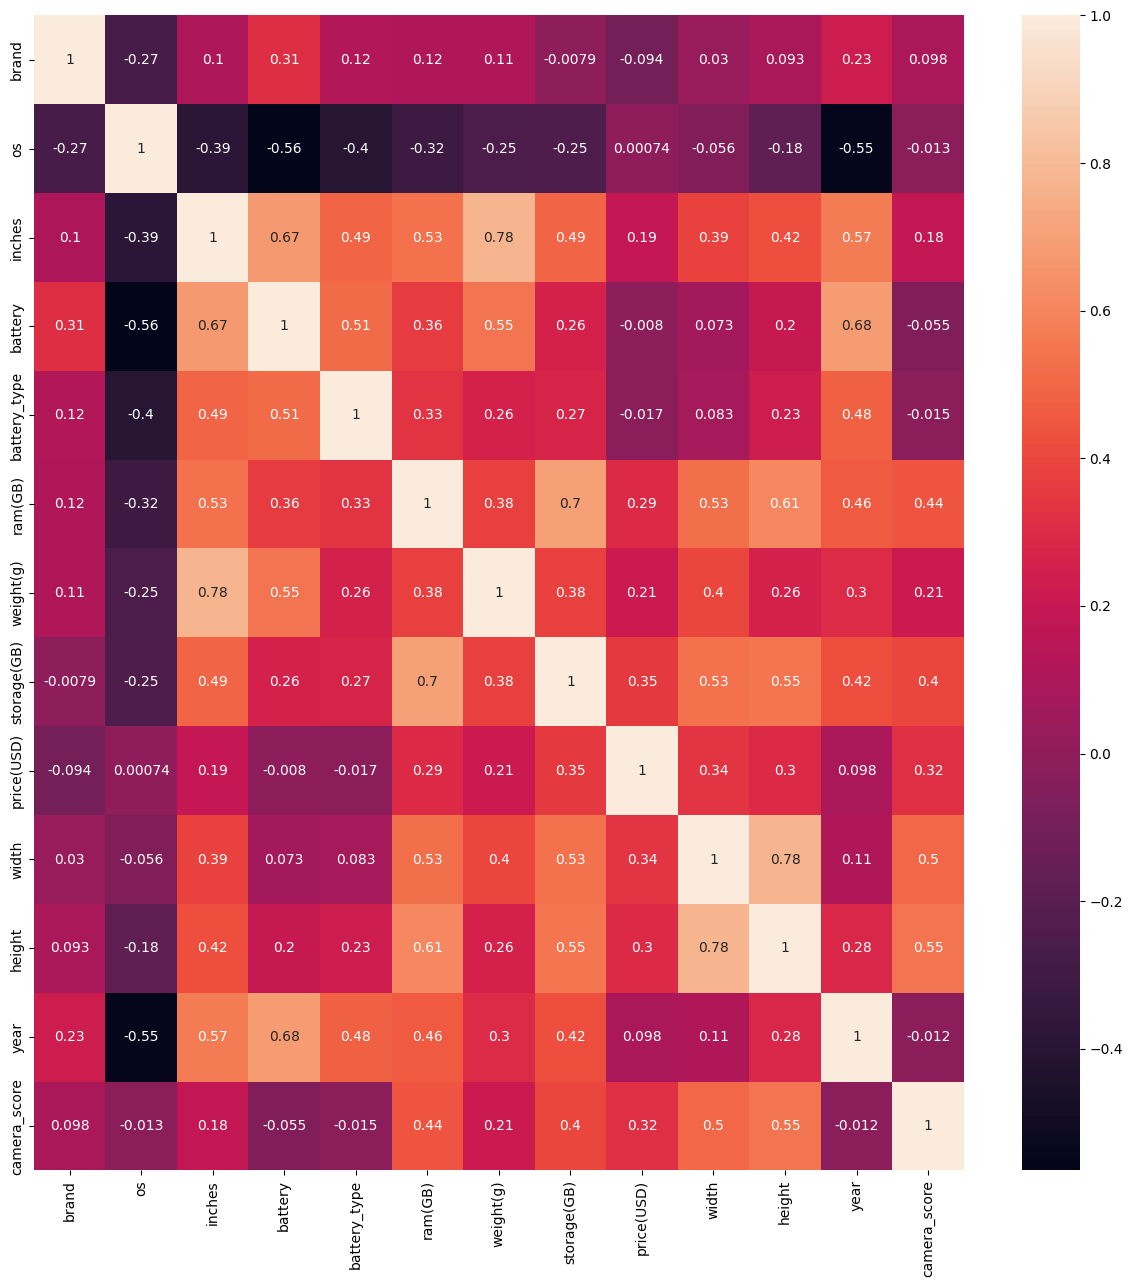

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)

## Масштабирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

In [ ]:
X = df.drop(['price(USD)'], axis = 1)
y = df['price(USD)']

## Разделение выборки на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1209, 12), (1209,), (303, 12), (303,))

## Обучение ансамблевых моделей

### Модель *бэггинга*

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagging_model = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
bagging_model.fit(X_train, y_train)

bagging_y = bagging_model.predict(X_test)

In [ ]:
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bagging_model.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

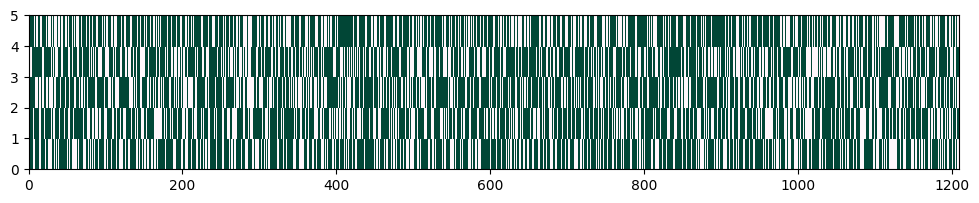

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='PuBuGn')
plt.show()

In [ ]:
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели 1 размер OOB составляет 36.15%
Для модели 2 размер OOB составляет 36.059999999999995%
Для модели 3 размер OOB составляет 36.89%
Для модели 4 размер OOB составляет 37.8%
Для модели 5 размер OOB составляет 37.3%


### *Случайный лес*

In [ ]:
# 10 деревьев
tree = RandomForestRegressor(n_estimators=10, random_state=12)
tree.fit(X_train, y_train)
tree_y = tree.predict(X_test)

In [ ]:
tree_y

array([0.10176991, 0.2591085 , 0.05561593, 0.19871504, 0.14159292,
       0.08080177, 0.10339233, 0.35619469, 0.09459646, 0.17923319,
       0.11712035, 0.19685841, 0.21578761, 0.14050885, 0.09756637,
       0.08584071, 0.11147566, 0.08453142, 0.26202389, 0.08601062,
       0.04324726, 0.10297699, 0.23807788, 0.0880531 , 0.38230088,
       0.30313009, 0.08893805, 0.02763274, 0.14610566, 0.09175522,
       0.15221239, 0.09159292, 0.12538301, 0.10486726, 0.10474336,
       0.18858354, 0.18650442, 0.14779159, 0.1135469 , 0.15115472,
       0.15588407, 0.11712035, 0.17208053, 0.06548673, 0.11451372,
       0.04061947, 0.32364779, 0.28821504, 0.30353982, 0.08038348,
       0.12141593, 0.08893805, 0.22787611, 0.26150442, 0.16497788,
       0.14291549, 0.09140118, 0.09335752, 0.07710575, 0.06016947,
       0.17787611, 0.09557522, 0.18858354, 0.36411504, 0.14773894,
       0.27396903, 0.12131814, 0.17377301, 0.27402655, 0.06769912,
       0.16566394, 0.02827743, 0.33141593, 0.05584071, 0.10375

## Ada boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost_model = AdaBoostRegressor(random_state=42)
ada_boost_model.fit(X_train, y_train)
predictions = ada_boost_model.predict(X_test)
predictions

array([0.16756232, 0.1859162 , 0.14925959, 0.26920256, 0.14478193,
       0.17883235, 0.14478193, 0.47063134, 0.17883235, 0.17883235,
       0.17883235, 0.17883235, 0.17883235, 0.17883235, 0.14392564,
       0.14925959, 0.17883235, 0.14925959, 0.25469012, 0.17883235,
       0.14925959, 0.15760683, 0.18824637, 0.13246773, 0.25469012,
       0.33385408, 0.13521878, 0.13521878, 0.18824637, 0.17883235,
       0.2616506 , 0.14478193, 0.16756232, 0.13061342, 0.17883235,
       0.17395657, 0.16756232, 0.16756232, 0.22073009, 0.16756232,
       0.14869284, 0.17883235, 0.18824637, 0.19664357, 0.17883235,
       0.14478193, 0.18824637, 0.26920256, 0.26240248, 0.11645297,
       0.14925959, 0.14478193, 0.14478193, 0.17883235, 0.2616506 ,
       0.13521878, 0.14925959, 0.16756232, 0.14925959, 0.14392564,
       0.17395657, 0.12097364, 0.17395657, 0.2616506 , 0.17395657,
       0.18824637, 0.17883235, 0.16756232, 0.30167762, 0.12097364,
       0.17883235, 0.14925959, 0.26920256, 0.14925959, 0.16756

## Модель градиентного бустинга

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gradient_model = GradientBoostingRegressor(n_estimators=5)
gradient_model.fit(X_train, y_train)
y_gradientboosting = gradient_model.predict(X_test)
y_gradientboosting

array([0.13511246, 0.17233101, 0.11277814, 0.18850368, 0.13255121,
       0.12122442, 0.11866317, 0.12122442, 0.13511246, 0.13511246,
       0.13511246, 0.13511246, 0.13511246, 0.13511246, 0.11866317,
       0.12949012, 0.13511246, 0.12949012, 0.15173054, 0.12122442,
       0.11866317, 0.12014078, 0.15173054, 0.11866317, 0.18850368,
       0.28359385, 0.11866317, 0.11866317, 0.15173054, 0.12122442,
       0.13511246, 0.13255121, 0.12122442, 0.13255121, 0.13511246,
       0.11866317, 0.13255121, 0.13511246, 0.12122442, 0.12122442,
       0.12723572, 0.13511246, 0.15173054, 0.13255121, 0.13511246,
       0.10475473, 0.21019676, 0.14315799, 0.175785  , 0.11866317,
       0.12949012, 0.11866317, 0.13255121, 0.12122442, 0.13511246,
       0.13255121, 0.11866317, 0.13511246, 0.0988697 , 0.11277814,
       0.17687004, 0.11866317, 0.11866317, 0.12949012, 0.13255121,
       0.21019676, 0.11840048, 0.13511246, 0.20638317, 0.11866317,
       0.13511246, 0.11866317, 0.16867485, 0.11277814, 0.12122

## Стекинг

In [ ]:
dataset = Dataset(X_train, y_train, X_test)

model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 10},name='rf')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={},name='lr')

pipeline = ModelsPipeline(model_rf, model_lr)
stack_ds = pipeline.stack(k=15, seed=111)

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
stacker_y = stacker.predict()
results = stacker.validate(k=15, scorer=mean_squared_error)

Metric: mean_squared_error
Folds accuracy: [0.017915427802896483, 0.021731769122982064, 0.013347832485804257, 0.017442330518269072, 0.029014708325439023, 0.014758619902145338, 0.02199045232996773, 0.017393816441439485, 0.016860918058763073, 0.017211432936300803, 0.02779566716490132, 0.016901787855646486, 0.018112122803949016, 0.01843528279333738, 0.033008916474471864]
Mean accuracy: 0.020128072334420894
Standard Deviation: 0.005419890362223638
Variance: 2.9375211538524682e-05


## Модель многослойного персептрона

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50),  # Структура скрытых слоев
                   activation='relu',             # Функция активации
                   solver='adam',                 # Оптимизатор
                   max_iter=1000,                 # Максимальное число итераций
                   random_state=42)

# Обучение модели
mlp.fit(X_train, y_train)

nn_y = mlp.predict(X_test)
nn_y

array([0.11538884, 0.1475732 , 0.09323403, 0.22812901, 0.10920988,
       0.13014394, 0.08178939, 0.11760709, 0.10610423, 0.11396791,
       0.13423277, 0.16312752, 0.12729333, 0.12887886, 0.07471095,
       0.0960732 , 0.10433174, 0.08557473, 0.15507126, 0.10988527,
       0.06104875, 0.10879311, 0.24910293, 0.10433499, 0.28092765,
       0.23801488, 0.04902827, 0.06365788, 0.16587253, 0.09987761,
       0.12508277, 0.05000829, 0.10445032, 0.09697995, 0.10331713,
       0.05920072, 0.07695417, 0.11933005, 0.1128849 , 0.09731224,
       0.07838016, 0.13423277, 0.21531335, 0.08918128, 0.10878526,
       0.05755499, 0.426858  , 0.15757394, 0.26443565, 0.09275872,
       0.11582431, 0.11065747, 0.10539497, 0.09496359, 0.15870614,
       0.18636052, 0.09057254, 0.11070021, 0.09295011, 0.05394476,
       0.11573772, 0.08166461, 0.05920072, 0.11768173, 0.11024979,
       0.38750266, 0.07822764, 0.11128127, 0.24819281, 0.09657004,
       0.11785008, 0.06577801, 0.20268041, 0.0654479 , 0.10149

In [ ]:
from gmdh import Multi, split_data

In [ ]:
model = Multi()
x_train, x_test, y_train, y_test = split_data(X, y, test_size=0.33)

model.fit(x_train, y_train, k_best=2, test_size=0.3)

y_predicted = model.predict(X_test)
y_predicted

array([0.14208213, 0.15213179, 0.11057812, 0.21294061, 0.11326468,
       0.18122046, 0.08545414, 0.13698165, 0.14320159, 0.14481173,
       0.14500974, 0.15271739, 0.15417166, 0.14575538, 0.08192499,
       0.1245362 , 0.13336794, 0.12275594, 0.17018991, 0.14239416,
       0.07194184, 0.11098339, 0.2083537 , 0.11256565, 0.22848628,
       0.22135126, 0.07678513, 0.07882243, 0.18729172, 0.13011019,
       0.14333139, 0.08402621, 0.13332594, 0.12947767, 0.1326047 ,
       0.08911677, 0.11578084, 0.14635501, 0.14036831, 0.1316984 ,
       0.12951168, 0.14500974, 0.19079406, 0.12509798, 0.13163968,
       0.06014699, 0.20485126, 0.19691121, 0.21110545, 0.09127589,
       0.12908191, 0.11872863, 0.14331796, 0.1111788 , 0.19870576,
       0.16407523, 0.08942233, 0.13865871, 0.10409659, 0.09450742,
       0.17633032, 0.13255134, 0.08911677, 0.12571356, 0.12078037,
       0.19370552, 0.11453216, 0.14269018, 0.21274692, 0.08987196,
       0.14011519, 0.07178486, 0.2392642 , 0.07047723, 0.13145

In [ ]:
from gmdh import Mia

mia_model = Mia()
mia_model.fit(x_train, y_train, k_best=5, p_average=3)

y_mia = mia_model.predict(X_test)
y_mia

array([ 0.15913822,  0.16092086,  0.1170128 ,  0.2896894 ,  0.12014218,
        0.12538191,  0.09444396,  0.1406753 ,  0.166097  ,  0.15999851,
        0.16482614,  0.16017894,  0.16988662,  0.17092471,  0.08577415,
        0.12126872,  0.15739188,  0.12138252,  0.21974952,  0.1437926 ,
        0.08574617,  0.11747657,  0.19723418,  0.11587192,  0.25088256,
        0.33463973,  0.08562167,  0.08562167,  0.18896404,  0.14152684,
        0.16035437,  0.1122179 ,  0.14376598,  0.13219958,  0.16105563,
        0.1040853 ,  0.12064946,  0.16299098,  0.1437812 ,  0.14102891,
        0.13976987,  0.16482614,  0.21688645,  0.12041645,  0.15501119,
        0.08574844,  0.18442375,  0.17798824,  0.21632034,  0.08527284,
        0.1209401 ,  0.11589481,  0.13302232,  0.11006675,  0.17463837,
        0.13497775,  0.10411045,  0.15675786,  0.11702471,  0.1041211 ,
        0.14494979,  0.12484199,  0.1040853 ,  0.12078691,  0.11926819,
        0.16523433,  0.11052362,  0.15999851,  0.30774505,  0.09

## Оценка моделей

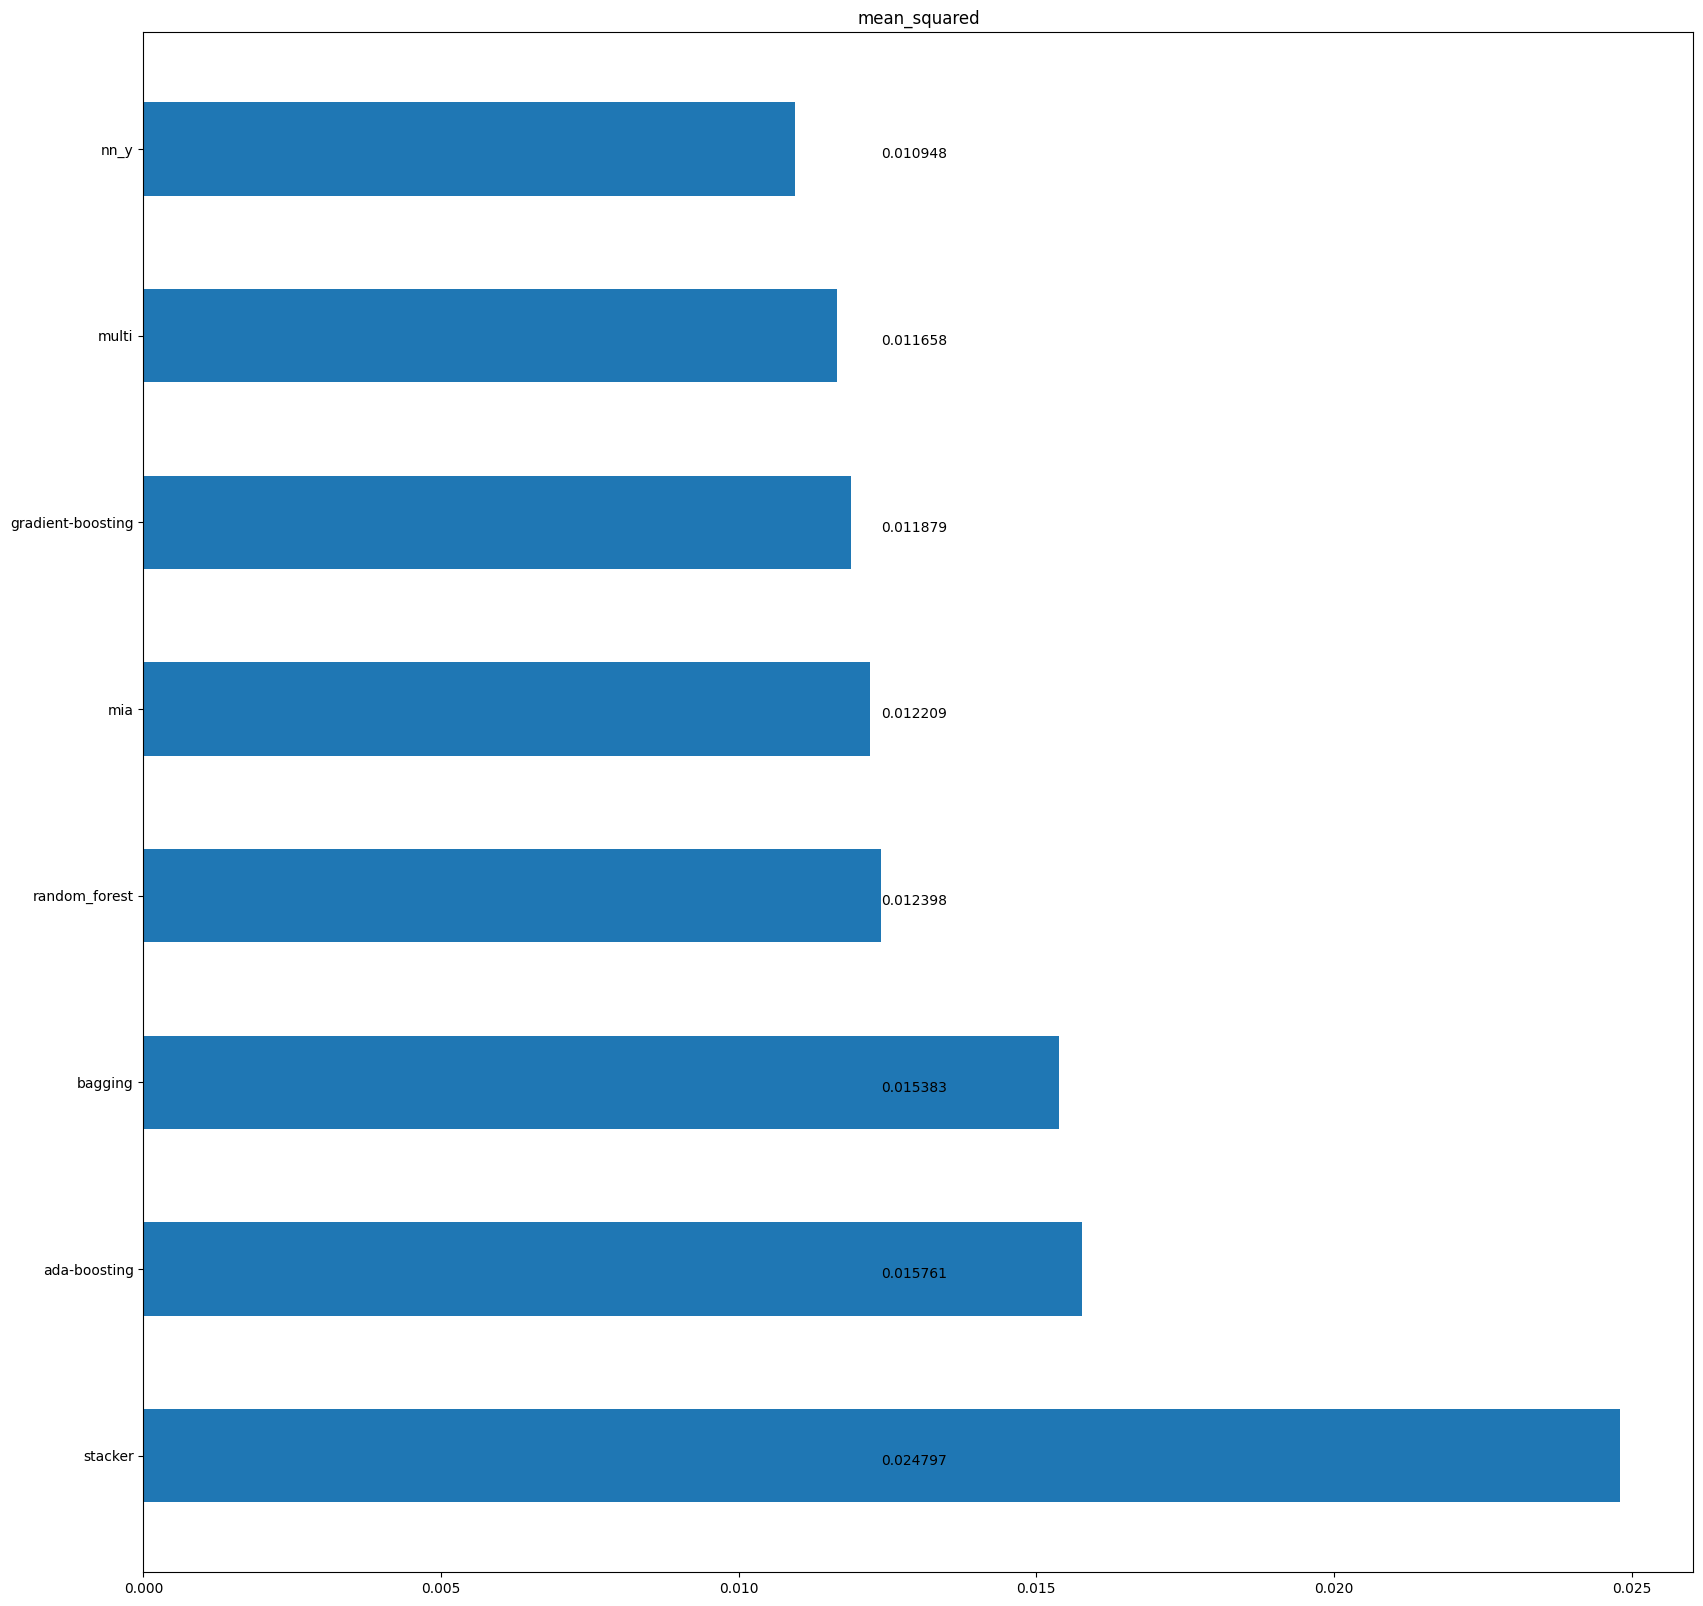

In [ ]:
results_metrics = [mean_squared_error(y_test, bagging_y), mean_squared_error(y_test, tree_y), mean_squared_error(y_test, predictions), mean_squared_error(y_test, y_gradientboosting), mean_squared_error(y_test, stacker_y), mean_squared_error(y_test, nn_y), mean_squared_error(y_test, y_predicted), mean_squared_error(y_test, y_mia)]
model_list = ['bagging', 'random_forest', 'ada-boosting', 'gradient-boosting', 'stacker', 'nn_y', 'multi', 'mia']

sorted_el = list(sorted(list(zip(model_list, results_metrics)), key=lambda x: -x[1]))
results_metrics = list(map(lambda x: x[1], sorted_el))
model_list = list(map(lambda x: x[0], sorted_el))

fig, ax = plt.subplots(figsize=(20,20))
pos = np.arange(len(model_list))
rects = ax.barh(pos, results_metrics,
             align='center',
             height=0.5,
             tick_label=model_list)
ax.set_title('mean_squared')
for a, b in zip(pos, results_metrics):
    plt.text(max(results_metrics)/2, a-0.05, str(round(b,6)), color='black')
plt.show()